<a href="https://colab.research.google.com/github/pachterlab/COVID-19-testing-database/blob/master/notebooks/basic_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --output-file="logs.csv" "https://docs.google.com/spreadsheets/d/10I8bVkLzvrmXJsb5N-8JSFpWw5vBwDKYzyOVAI4viKo/export?format=csv&gid=1514440859" -O "sheet.csv"

In [2]:
!awk 'NR>4' sheet.csv > data.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def nd(arr):
  return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_csv("data.csv")
df.index = df.institution.values
df["testing_num"] = df.testing.map(lambda x: {"FALSE": 0, "TRUE": 1}.get(x, 0))

In [5]:
df.head()

,institution,school_type,state,testing_info_link,rtc_model,last_updated,testing,testing_type,test_initial,test_recurring,test_freq,test_vendor,test_pool,comments,testing_num
Abilene Christian University,Abilene Christian University,Private,TX,https://www.acu.edu/coronavirus/july-17-2020-c...,Planning for in-person,7/22/2020,TRUE,Both asymptomatic and symptomatic,FALSE,FALSE,0.00,NaN,NaN,"Our plan includes testing any faculty, staff a...",1
Academy of Art University,Academy of Art University,Private,CA,https://www.academyart.edu/academy-of-art-univ...,Proposing a hybrid model,7/27/2020,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,0
Adelphi University,Adelphi University,Private,NY,https://www.adelphi.edu/restart/wp-content/upl...,Proposing a hybrid model,7/27/2020,TRUE,Symptomatic,TRUE,TRUE,0.33,Vault Health,NaN,"Re-entry testing of residential students, inte...",1
Adrian College,Adrian College,Private,MI,http://adrian.edu/news/ac-president-docking-sa...,Planning for in-person,7/27/2020,FALSE,No voluntary testing,FALSE,FALSE,0.00,NaN,NaN,Students are required to have a negative test ...,0
Agnes Scott College,Agnes Scott College,Private,GA,https://www.agnesscott.edu/coronavirus/updates...,Planning for in-person,7/22/2020,TRUE,Unknown,TRUE,Unknown,0.00,Unknown,NaN,"Athletes will be tested upon arrival, students...",1


In [6]:
df.columns

Index(['institution', 'school_type', 'state', 'testing_info_link', 'rtc_model',
       'last_updated', 'testing', 'testing_type', 'test_initial',
       'test_recurring', 'test_freq', 'test_vendor', 'test_pool', 'comments',
       'testing_num'],
      dtype='object')

In [8]:
df.groupby(["school_type", "test_initial", "test_recurring"])["testing"].count().sort_values()


school_type  test_initial  test_recurring
Private      FALSE         Unknown             2
             Unknown       TRUE                2
                           FALSE               3
Public       FALSE         Unknown             4
                           TRUE                5
             TRUE          Unknown             5
Private      FALSE         TRUE                6
Public       TRUE          FALSE               9
Private      TRUE          Unknown            12
                           FALSE              15
Public       TRUE          TRUE               16
             Unknown       Unknown            21
Private      Unknown       Unknown            25
             TRUE          TRUE               60
             FALSE         FALSE             119
Public       FALSE         FALSE             161
Name: testing, dtype: int64

In [9]:
pd.DataFrame(df.test_vendor.value_counts()).head(10)

,test_vendor
Broad Institute,19
Student Health,5
Vault Health,2
Student Health Services,2
LabCorp,2
University Health Center,2
unlisted,2
In house lab,2
Quest,2
arah Bush Lincoln Medical System,1


In [103]:
v = df.groupby(['state', 'test_recurring']).size().unstack(fill_value=0).sort_values(by="TRUE", ascending=False)
vp = v/v.values.sum(axis=1)[:,None]*100

In [100]:
v.index

Index(['MA', 'NY', 'PA', 'MI', 'CT', 'ME', 'AL', 'CA', 'FL', 'NH', 'OH', 'TN',
       'IL', 'VA', 'WV', 'OK', 'RI', 'NJ', 'TX', 'NC', 'SC', 'DC', 'GA', 'IN',
       'IA', 'NM', 'AZ', 'CO', 'OR', 'WI', 'WY', 'MN', 'VT', 'ND', 'LA', 'MD',
       'MO', 'WA', 'UT', 'SD', 'AK', 'NV', 'NE', 'MS', 'KY', 'KS', 'HI', 'DE',
       'AR', 'MT'],
      dtype='object', name='state')

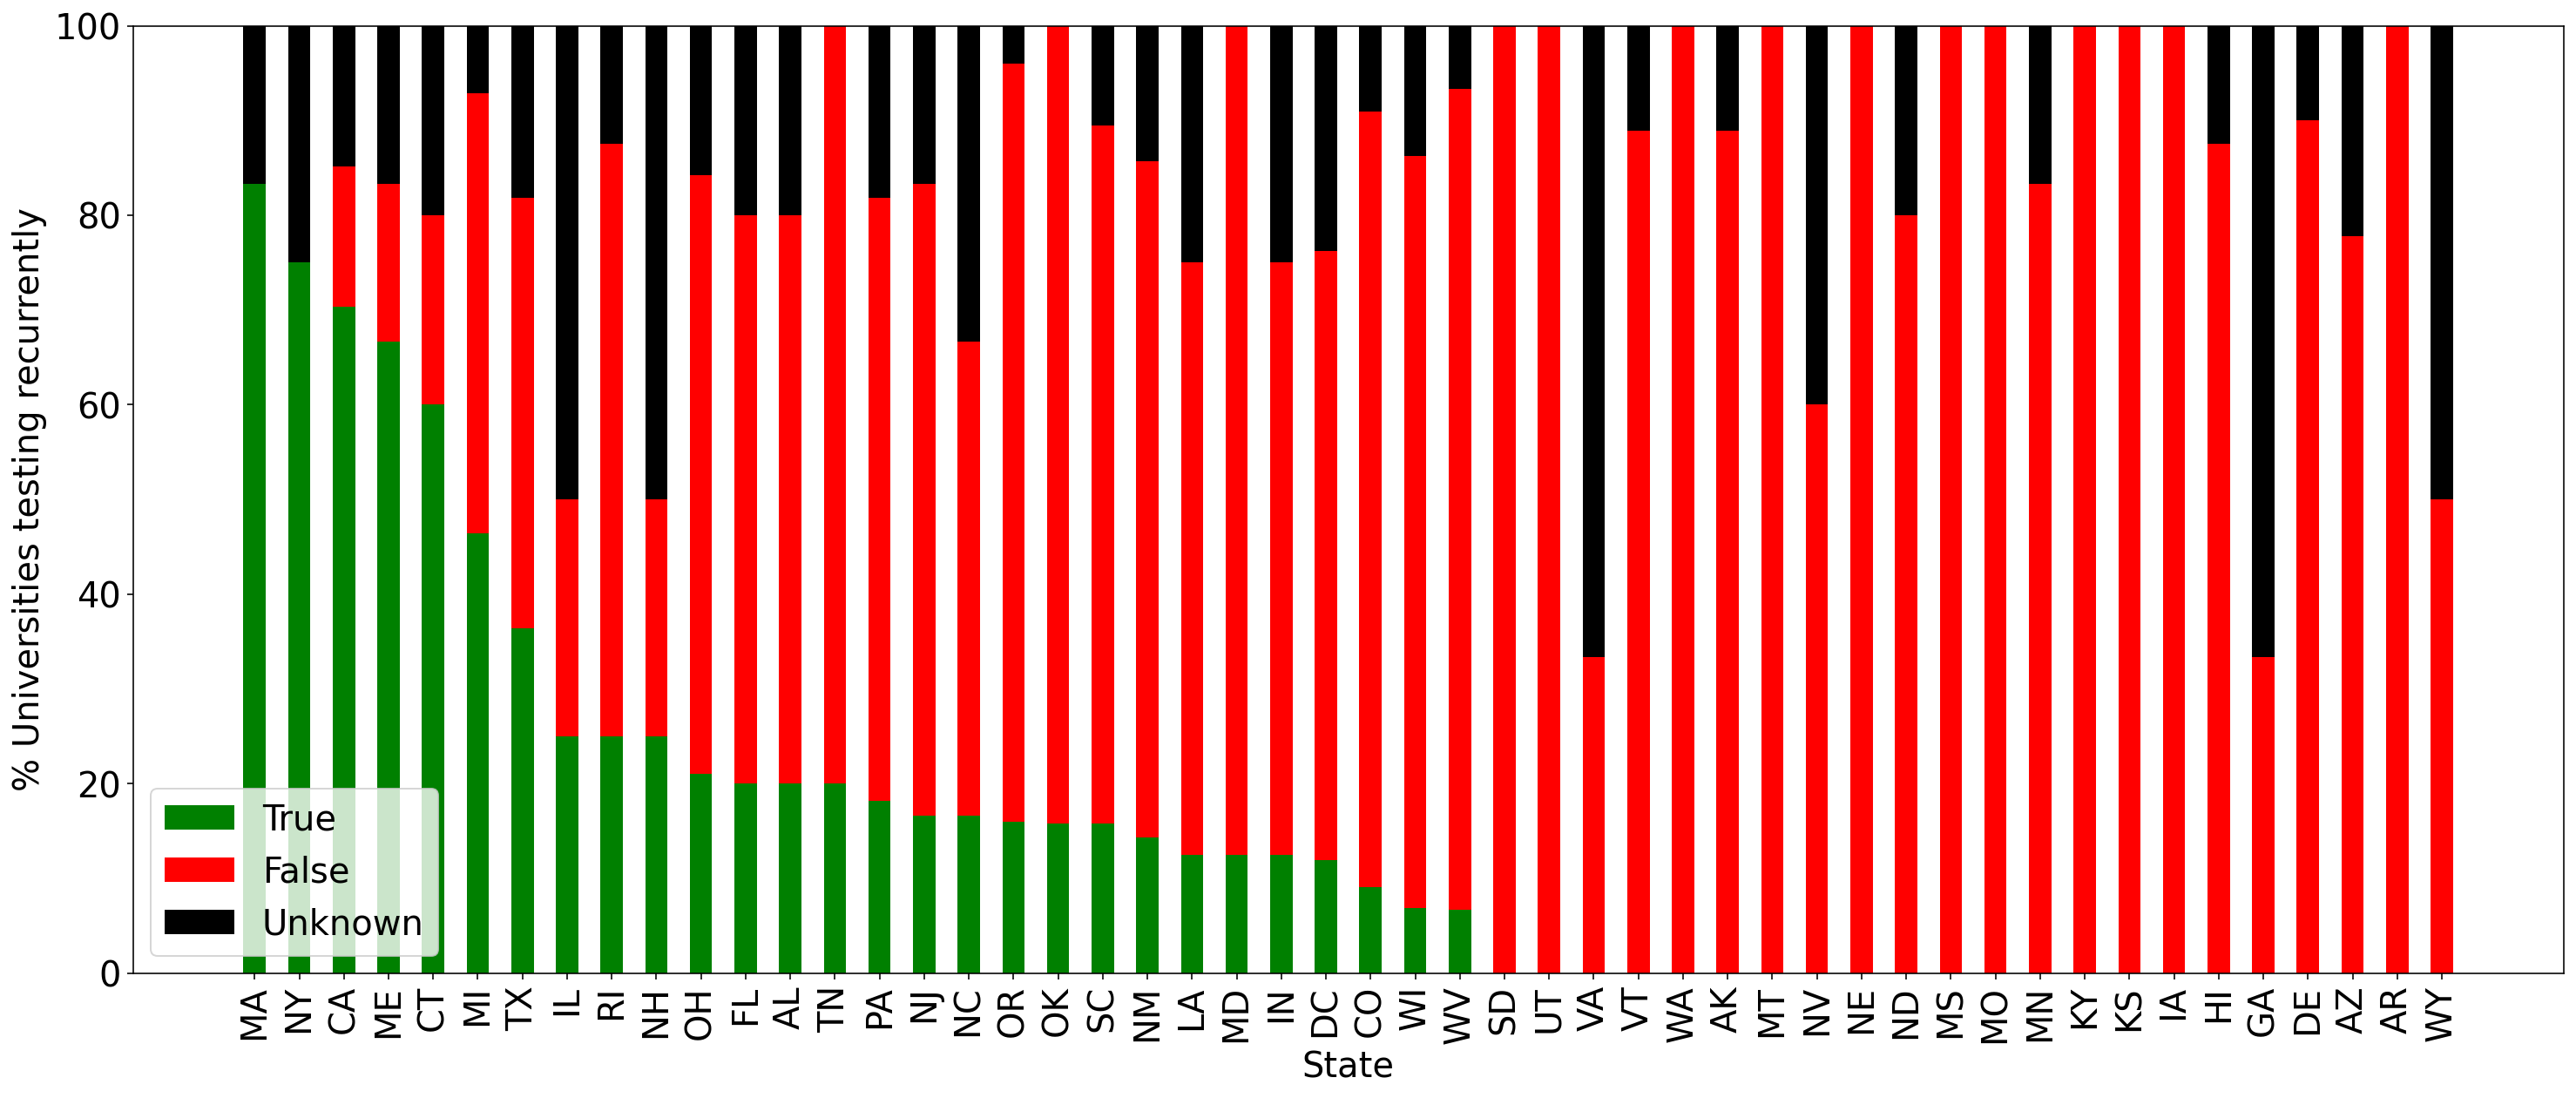

In [104]:
fig, ax = plt.subplots(figsize=(25,10))


ind = np.arange(v.shape[0])    # the x locations for the groups
labels = v.index.values
vp  = vp.sort_values(by="TRUE", ascending=False)

x = vp.TRUE.values
y = vp.FALSE.values
z = vp.Unknown.values

#width = 0.5     # the width of the bars: can also be len(x) sequence

ax.bar(ind, x, width,label="True", color="green")
ax.bar(ind, y, width, bottom=x, label="False", color="red")
ax.bar(ind, z, width, bottom=x+y, label="Unknown", color="black")

kwd = {
    "xticks" : ind,
    "xticklabels": labels,
    "xlabel": "State",
    "ylabel": "% Universities testing recurrently"
}
ax.set(**kwd)
ax.set_xticklabels(labels, rotation=90)
ax.legend()


fig.show()

In [59]:
df.columns

Index(['institution', 'school_type', 'state', 'testing_info_link', 'rtc_model',
       'last_updated', 'testing', 'testing_type', 'test_initial',
       'test_recurring', 'test_freq', 'test_vendor', 'test_pool', 'comments',
       'testing_num'],
      dtype='object')

In [63]:
# confusion matrix, testing initial vs testing recurring
v = df.groupby(['test_initial', 'test_recurring']).size().unstack(fill_value=0).sort_values(by="FALSE", ascending=False)
v/v.values.sum()*100

test_recurring,FALSE,TRUE,Unknown
test_initial,,,
FALSE,60.085837,2.360515,1.287554
TRUE,5.150215,16.523605,3.648069
Unknown,0.643777,0.429185,9.871245


In [73]:
# Testing based on school type
v = df.groupby(['school_type', 'testing']).size().unstack(fill_value=0).sort_values(by="FALSE", ascending=False)
v/v.values.sum(axis=1)[:,None]*100

testing,FALSE,TRUE,Unknown
school_type,,,
Public,43.946188,49.775785,6.278027
Private,32.377049,54.918033,12.704918


In [74]:
v = df.groupby(['rtc_model', 'testing']).size().unstack(fill_value=0).sort_values(by="FALSE", ascending=False)

v/v.values.sum(axis=1)[:,None]*100

testing,FALSE,TRUE,Unknown
rtc_model,,,
Planning for in-person,45.669291,46.850394,7.480315
Proposing a hybrid model,24.260355,64.497041,11.242604
Planning for online,52.777778,30.555556,16.666667
Considering a range of scenarios,25.000000,50.000000,25.000000
"All classes online, but many students will live on campus",0.000000,100.000000,0.000000
Proposing a hybrid model (all students on campus),0.000000,100.000000,0.000000


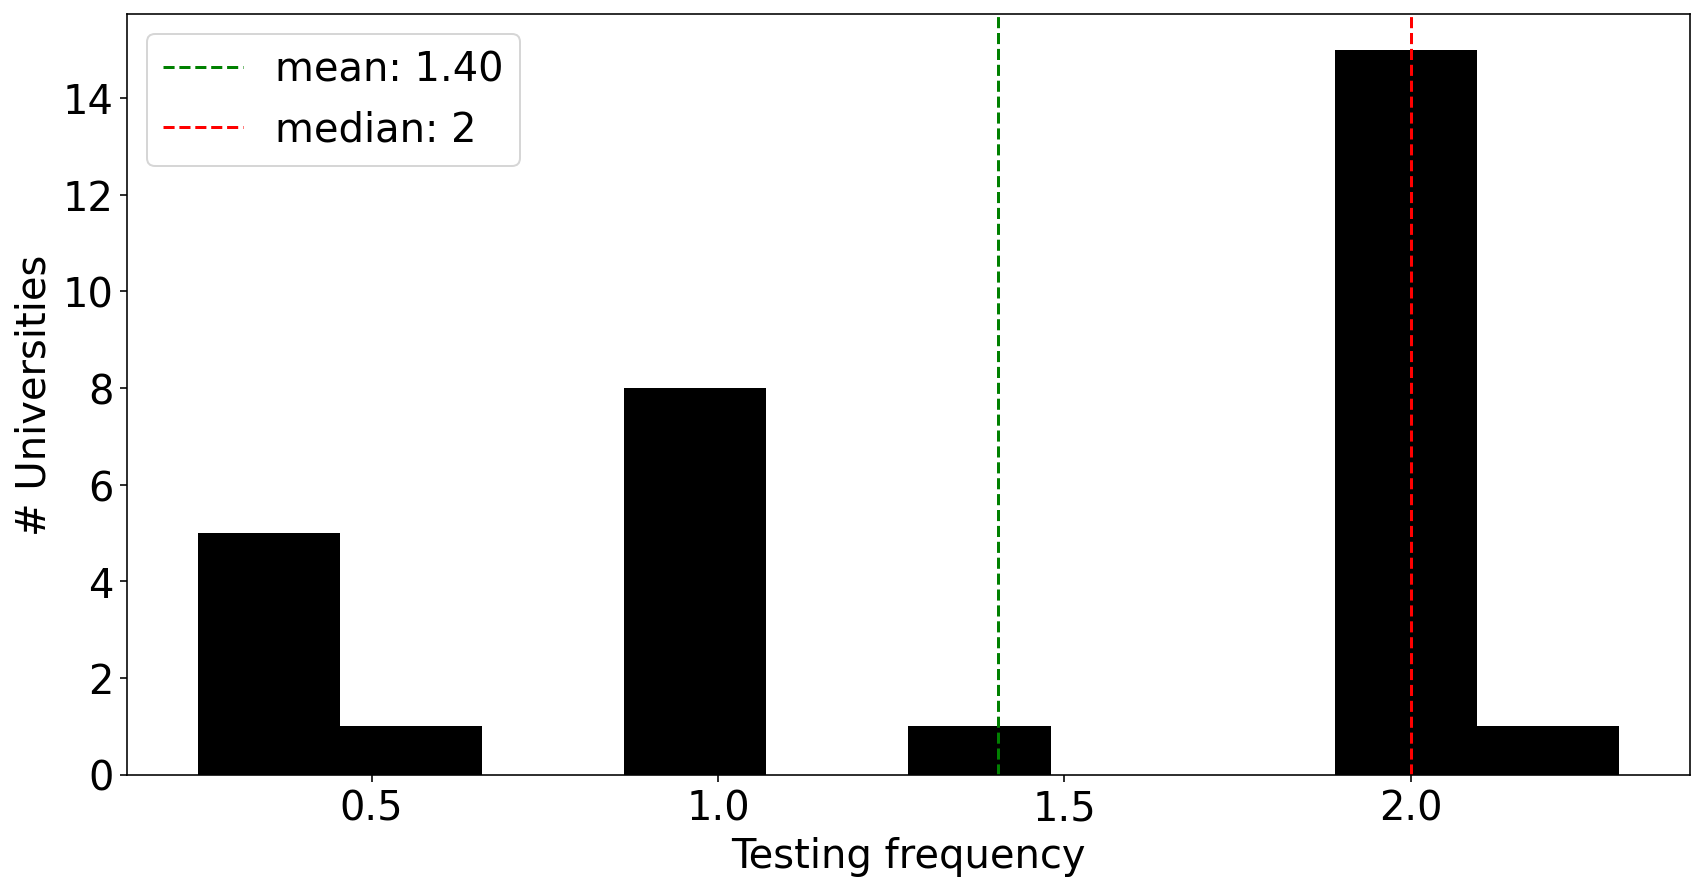

In [98]:
fig, ax = plt.subplots(figsize=(14,7))
v = df.query("test_freq!=0").test_freq.values
x = v[~np.isnan(v)]
mean = x.mean()
median = np.median(x)
ax.hist(x, color="k")
ax.axvline(mean, label=f"mean: {mean:,.2f}", color="green", linestyle="--")
ax.axvline(median, label=f"median: {median:,.0f}", color="red", linestyle="--")
kwd = {
    "xlabel": "Testing frequency",
    "ylabel": "# Universities"
}
ax.set(**kwd)
ax.legend()

fig.show()

In [97]:
df.columns

Index(['institution', 'school_type', 'state', 'testing_info_link', 'rtc_model',
       'last_updated', 'testing', 'testing_type', 'test_initial',
       'test_recurring', 'test_freq', 'test_vendor', 'test_pool', 'comments',
       'testing_num'],
      dtype='object')

In [105]:
v = df.groupby(['state', 'test_initial']).size().unstack(fill_value=0)
initial = v/v.values.sum(axis=1)[:,None]*100

v = df.groupby(['state', 'test_recurring']).size().unstack(fill_value=0)
recurrent = v/v.values.sum(axis=1)[:,None]*100

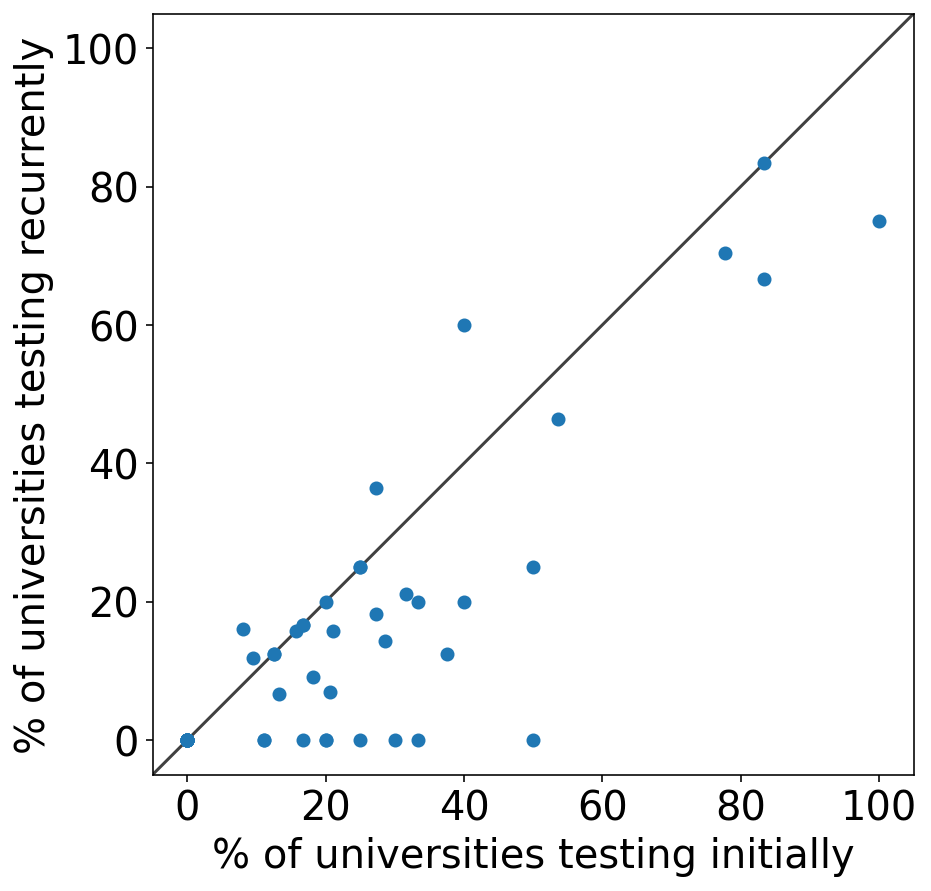

In [111]:
fig, ax = plt.subplots(figsize=(7,7))

x = initial.TRUE.values
y = recurrent.TRUE.values

ax.scatter(x, y)
yex(ax)

kwd = {
    "xlabel": "% of universities testing initially",
    "ylabel": "% of universities testing recurrently"
}
ax.set(**kwd)

fig.show()

In [112]:
!wget https://covidtracking.com/api/v1/states/daily.csv 

--2020-08-02 19:55:03--  https://covidtracking.com/api/v1/states/daily.csv
Resolving covidtracking.com (covidtracking.com)... 159.65.216.232, 104.248.63.231, 2604:a880:400:d0::6d9:d001, ...
Connecting to covidtracking.com (covidtracking.com)|159.65.216.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1836214 (1.8M) [text/csv]
Saving to: ‘daily.csv’

daily.csv           100%[===================>]   1.75M  3.21MB/s    in 0.5s    

2020-08-02 19:55:04 (3.21 MB/s) - ‘daily.csv’ saved [1836214/1836214]



In [114]:
daily = pd.read_csv("daily.csv")

In [118]:
gb = daily.groupby("state")[["positive", "negative"]].sum()
pos = gb["positive"]/(gb["positive"] + gb["negative"])

In [121]:
initial.index.map(pos)

Float64Index([0.011943613371203808,  0.10033725399300127,  0.07051246531771728,
               0.14991850327795642,  0.05993639764418329,  0.11598506470419201,
               0.11814297048727446,  0.11573251477169326,  0.11611338476991037,
                0.0920745216846094,  0.11049130508505597, 0.014322422598703364,
               0.10466822874872947,  0.10008210598398298,  0.10931812492602844,
               0.09266875103233115, 0.047977670757016956,  0.09743700529950346,
                0.1428311325923007,  0.13351548841438862, 0.035561272835055974,
               0.08608370268523231,  0.06617555052943341,   0.0650595155013589,
               0.10310215734566697, 0.016909921139266173,  0.07083143540148785,
               0.03624430576963657,  0.11296302895251528,  0.05432661325039984,
                0.1592026572762739, 0.037766846185354974,  0.07921329563136684,
               0.13461594729203855,  0.07450787715695553,  0.04640132326274825,
              0.039787524373773336,  0.1

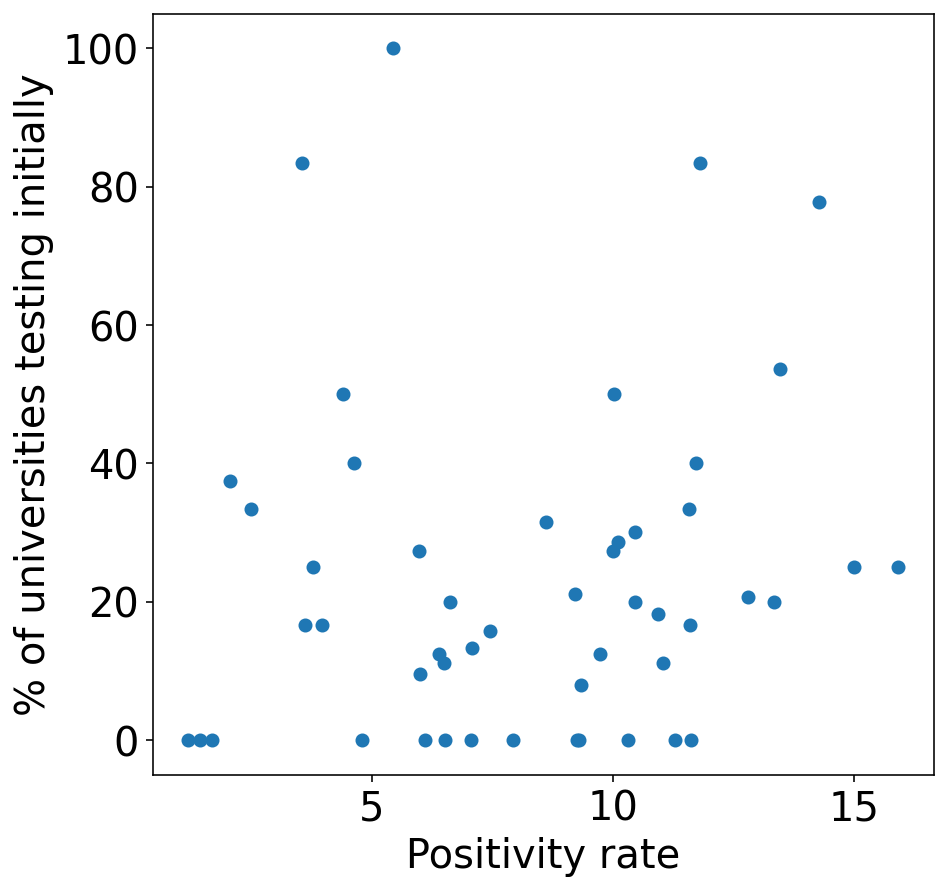

In [125]:
fig, ax = plt.subplots(figsize=(7,7))

x = initial.index.map(pos)*100
y = initial.TRUE.values

ax.scatter(x, y)

kwd = {
    "xlabel": "Positivity rate",
    "ylabel": "% of universities testing initially"
}
ax.set(**kwd)

fig.show()

In [139]:
df.groupby("state")["test_recurring"].count().sort_values().values == df.groupby("state")["test_initial"].count().sort_values().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [136]:
df.query("state=='AK'")

,institution,school_type,state,testing_info_link,rtc_model,last_updated,testing,testing_type,test_initial,test_recurring,test_freq,test_vendor,test_pool,comments,testing_num
Alaska Pacific University,Alaska Pacific University,Private,AK,https://www.alaskapacific.edu/campus-reopening...,Proposing a hybrid model,7/27/2020,FALSE,No voluntary testing,FALSE,FALSE,0.0,NaN,NaN,Re-entry testing is encouraged but not mandate...,0
University of Alaska at Anchorage,University of Alaska at Anchorage,Public,AK,https://sites.google.com/alaska.edu/coronaviru...,Planning for online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
University of Alaska at Fairbanks,University of Alaska at Fairbanks,Public,AK,https://news.uaf.edu/?mailpoet_router&amp;endp...,Proposing a hybrid model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [141]:
df.groupby("state").count().institution.sort_values()

state
Multiple      1
WY            2
DE            3
AK            3
NV            4
HI            5
ID            5
AZ            5
MT            5
RI            6
NM            6
SD            8
DC            9
NH            9
VT           10
KY           10
UT           12
OK           13
ND           13
WV           13
MS           14
KS           14
AR           14
ME           15
CO           15
CT           15
OR           16
LA           16
WA           17
NE           17
IA           17
SC           18
NJ           20
WI           20
MN           20
TN           26
MD           27
IN           29
MO           30
VA           33
FL           35
GA           36
NC           36
IL           39
MI           39
AL           41
OH           41
MA           55
TX           69
PA           78
NY           87
CA          136
Name: institution, dtype: int64

In [148]:
"Yale University" in df.institution.values

True

In [155]:
usnr = pd.read_excel("http://andyreiter.com/wp-content/uploads/2019/09/US-News-Rankings-Universities-Through-2020.xlsx", header=1)

In [179]:
np.setdiff1d(usnr["University Name"], df.institution.values)

array(['College of William and Mary', 'Georgia Institute of Technology',
       'Pennsylvania State University-University Park',
       'Rutgers University-New Brunswick',
       'Texas A&M University-College Station',
       'University of California-Berkeley',
       'University of California-Davis',
       'University of California-Irvine',
       'University of California-Los Angeles',
       'University of California-San Diego',
       'University of California-Santa Barbara', 'University of Georgia',
       'University of Illinois-Urbana-Champaign',
       'University of Michigan-Ann Arbor',
       'University of North Carolina-Chapel Hill',
       'University of Texas-Austin', 'University of Wisconsin-Madison'],
      dtype=object)

In [180]:
top_map = {
  'College of William and Mary':"College of William & Mary", 
  'Georgia Institute of Technology': "University System of Georgia — Georgia Institute of Technology",
  'Pennsylvania State University-University Park': "Pennsylvania State University",
  'Rutgers University-New Brunswick': "Rutgers University",
  'Texas A&M University-College Station': "Texas A&M University system — College Station",
  'University of California-Berkeley': "University of California at Berkeley",
  'University of California-Davis':"University of California at Davis",
  'University of California-Irvine':"University of California at Irvine",
  'University of California-Los Angeles': "University of California at Los Angeles",
  'University of California-San Diego': "University of California at San Diego",
  'University of California-Santa Barbara': "University of California at Santa Barbara", 
  'University of Georgia': "University System of Georgia — University of Georgia",
  'University of Illinois-Urbana-Champaign': "University of Illinois at Urbana-Champaign",
  'University of Michigan-Ann Arbor': "University of Michigan at Ann Arbor",
  'University of North Carolina-Chapel Hill': "University of North Carolina at Chapel Hill",
  'University of Texas-Austin':"University of Texas at Austin", 
  'University of Wisconsin-Madison': "University of Wisconsin at Madison"
}

In [184]:
usnr["University Name"] = usnr["University Name"].apply(lambda x: top_map.get(x, x))

In [186]:
df[df.institution.isin(usnr["University Name"].values)]

,institution,school_type,state,testing_info_link,rtc_model,last_updated,testing,testing_type,test_initial,test_recurring,test_freq,test_vendor,test_pool,comments,testing_num
Boston College,Boston College,Private,MA,https://www.bostonglobe.com/2020/05/19/metro/b...,Planning for in-person,7/26/2020,TRUE,Unknown,TRUE,TRUE,1.0,analyzed by The Broad Institute,Unknown,"""weekly surveillance testing"" (https://www.bc....",1
Boston University,Boston University,Private,MA,https://www.bu.edu/back2bu/covid-19-testing-tr...,Proposing a hybrid model,7/28/2020,TRUE,Both asymptomatic and symptomatic,TRUE,TRUE,2.0,In house lab,NaN,NaN,1
Brandeis University,Brandeis University,Private,MA,https://www.brandeis.edu/fall-2020/pdfs/task-f...,Proposing a hybrid model,7/28/2020,TRUE,Asymptomatic,TRUE,TRUE,2.0,Broad Institute,NaN,"High-Frequency, Universal Testing. Brandeis wi...",1
Brown University,Brown University,Private,RI,https://healthy.brown.edu/updates/planning-groups,Proposing a hybrid model,7/27/2020,TRUE,Symptomatic,TRUE,TRUE,NaN,"University Health Services conducts, Lifespan ...",Unknown,They've implemented a testing pilot over the s...,1
California Institute of Technology,California Institute of Technology,Private,CA,https://coronavirus.caltech.edu/fall-2020-plan,Proposing a hybrid model,7/22/2020,TRUE,Symptomatic,Unknown,FALSE,0.0,NaN,NaN,Testing at the health center is not available ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villanova University,Villanova University,Private,PA,https://www1.villanova.edu/university/coronavi...,Waiting to decide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Wake Forest University,Wake Forest University,Private,NC,https://ourwayforward.wfu.edu,Proposing a hybrid model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Washington University in St. Louis,Washington University in St. Louis,Private,MO,https://covid19.wustl.edu/health-safety/,Proposing a hybrid model,7/30/2020,Unknown,Unknown,Unknown,Unknown,0.0,NaN,NaN,One of the most obtuse websites. But no mentio...,0
Worcester Polytechnic Institute,Worcester Polytechnic Institute,Private,MA,https://www.wpi.edu/we-are-wpi/academics,Proposing a hybrid model,7/28/2020,TRUE,Symptomatic,TRUE,TRUE,NaN,NaN,NaN,WPI has not released how they will test but ha...,1
